# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [3]:
    import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
# Carregando o arquivo
df = pd.read_csv('dados_dummy.csv')
# Verificando se o arquivo carregou corretamente
df.head()

,qtd_filhos,tipo_residencia,idade,tempo_emprego,possui_fone_comercial,qt_pessoas_residencia,mau,sexo_F,sexo_M,posse_de_veiculo_N,...,estado_civil_Civil marriage,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,possui_celular_1,possui_email_0,possui_email_1,possui_fone_0,possui_fone_1
0,0,House / apartment,58.832877,3.106849,0,2.0,False,False,True,False,...,False,True,False,False,False,True,True,False,True,False
1,0,House / apartment,52.356164,8.358904,0,1.0,False,True,False,True,...,False,False,False,True,False,True,False,True,False,True
2,0,House / apartment,52.356164,8.358904,0,1.0,False,True,False,True,...,False,False,False,True,False,True,False,True,False,True
3,0,House / apartment,46.224658,2.106849,1,2.0,False,False,True,False,...,False,True,False,False,False,True,False,True,False,True
4,0,House / apartment,29.230137,3.021918,0,2.0,False,True,False,False,...,False,True,False,False,False,True,True,False,True,False


## Tratando o DataFrame

In [6]:
# Verificando os tipos de varáveis 
df.dtypes

qtd_filhos                                  int64
tipo_residencia                            object
idade                                     float64
tempo_emprego                             float64
possui_fone_comercial                       int64
qt_pessoas_residencia                     float64
mau                                          bool
sexo_F                                       bool
sexo_M                                       bool
posse_de_veiculo_N                           bool
posse_de_veiculo_Y                           bool
posse_de_imovel_N                            bool
posse_de_imovel_Y                            bool
tipo_renda_Commercial associate              bool
tipo_renda_Pensioner                         bool
tipo_renda_State servant                     bool
tipo_renda_Student                           bool
tipo_renda_Working                           bool
educacao_Academic degree                     bool
educacao_Higher education                    bool


#### Entendendo os valores presentes na coluna ```tipo_residencia```                           

In [8]:
df.tipo_residencia.unique()                        

array(['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [9]:
df = pd.get_dummies(df, columns= ['tipo_residencia'])


In [10]:
df.head()

,qtd_filhos,idade,tempo_emprego,possui_fone_comercial,qt_pessoas_residencia,mau,sexo_F,sexo_M,posse_de_veiculo_N,posse_de_veiculo_Y,...,possui_email_0,possui_email_1,possui_fone_0,possui_fone_1,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,0,2.0,False,False,True,False,True,...,True,False,True,False,False,True,False,False,False,False
1,0,52.356164,8.358904,0,1.0,False,True,False,True,False,...,False,True,False,True,False,True,False,False,False,False
2,0,52.356164,8.358904,0,1.0,False,True,False,True,False,...,False,True,False,True,False,True,False,False,False,False
3,0,46.224658,2.106849,1,2.0,False,False,True,False,True,...,False,True,False,True,False,True,False,False,False,False
4,0,29.230137,3.021918,0,2.0,False,True,False,False,True,...,True,False,True,False,False,True,False,False,False,False


In [11]:
# Verificando se tem 'missing values' 
df.isnull().sum()

qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_fone_comercial                     0
qt_pessoas_residencia                     0
mau                                       0
sexo_F                                    0
sexo_M                                    0
posse_de_veiculo_N                        0
posse_de_veiculo_Y                        0
posse_de_imovel_N                         0
posse_de_imovel_Y                         0
tipo_renda_Commercial associate           0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Academic degree                  0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Civil marriage     

In [12]:
#Trocando todos os valores booleanos por 0 e 1
df[df.select_dtypes(include='bool').columns] = df.select_dtypes(include='bool').astype(int)
df.head(10)

,qtd_filhos,idade,tempo_emprego,possui_fone_comercial,qt_pessoas_residencia,mau,sexo_F,sexo_M,posse_de_veiculo_N,posse_de_veiculo_Y,...,possui_email_0,possui_email_1,possui_fone_0,possui_fone_1,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,0,2.0,0,0,1,0,1,...,1,0,1,0,0,1,0,0,0,0
1,0,52.356164,8.358904,0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,2.0,0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,0
4,0,29.230137,3.021918,0,2.0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,0,0
5,0,29.230137,3.021918,0,2.0,0,1,0,0,1,...,1,0,1,0,0,1,0,0,0,0
6,0,27.482192,4.024658,0,2.0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,0
7,0,27.482192,4.024658,0,2.0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,0
8,1,30.049315,4.438356,0,2.0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,0
9,1,30.049315,4.438356,0,2.0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,0


In [13]:
df['mau'].value_counts()

mau
0    16260
1      390
Name: count, dtype: int64

In [14]:
#Separando as variaveis explicativas da variavel target
X = df.drop('mau', axis=1)
y = df.mau

In [15]:
#Separando entre treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

#### 1. Definir um objeto com a função da árvore de decisão vista em aula.

In [18]:
clf =  DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

#### 2. Treinando o modelo com os dados que separamos para treinamento.

In [20]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [31]:
y_chapeu_train = clf.predict(X_train)
y_chapeu_train

array([0, 0, 0, ..., 0, 0, 0])

#### 3. Visualização da árvore

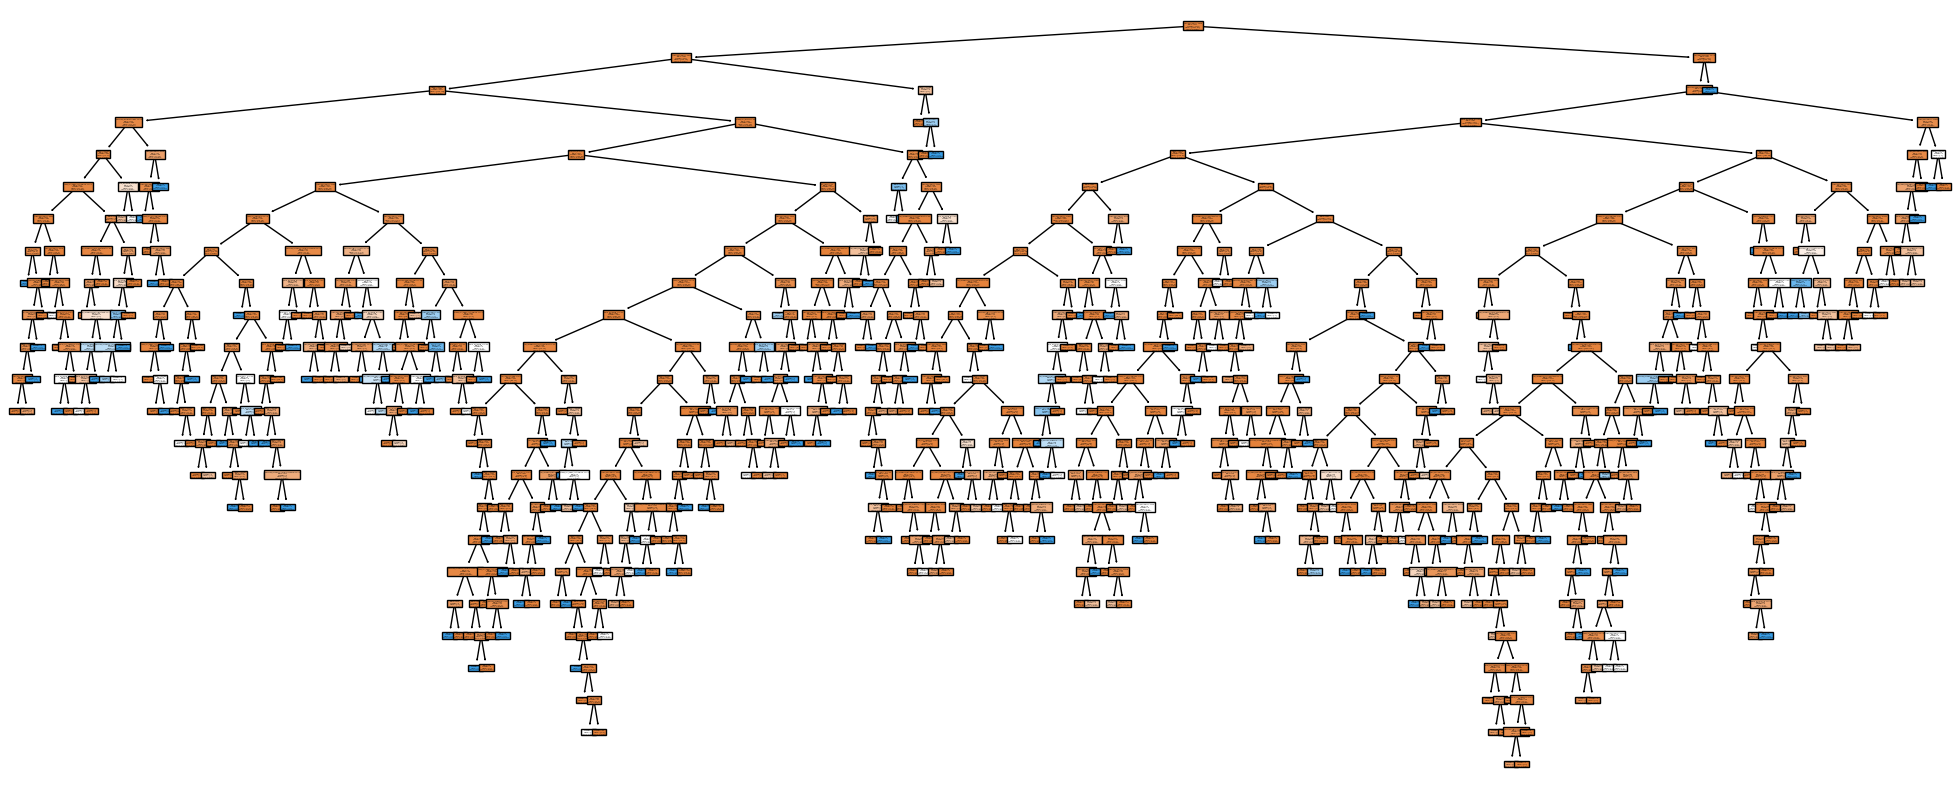

In [55]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X_train.columns);

#### 4. Visualização da matriz de confusão

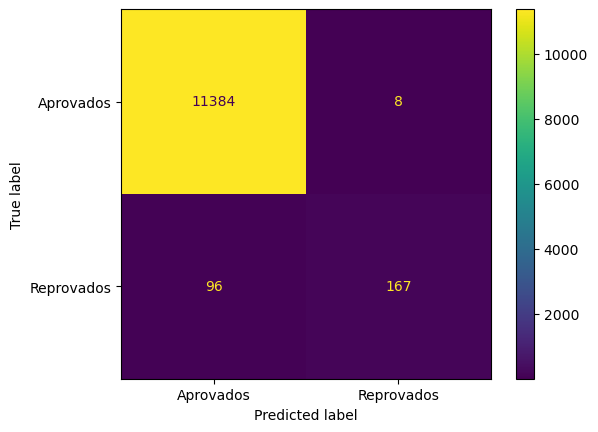

In [59]:
cm_train = confusion_matrix(y_train, y_chapeu_train)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot()

#### 5. Calculando a acurácia na base de treinamento

In [107]:
accuracia = accuracy_score(y_train, y_chapeu_train)

print(f'A acurácia na base de treinamento é de {accuracia*100:.2f}%')

A acurácia na base de treinamento é de 99.11%


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [65]:
#1. Classificação da base de teste
y_chapeu_test = clf.predict(X_test)
y_chapeu_test

array([0, 0, 0, ..., 0, 0, 0])

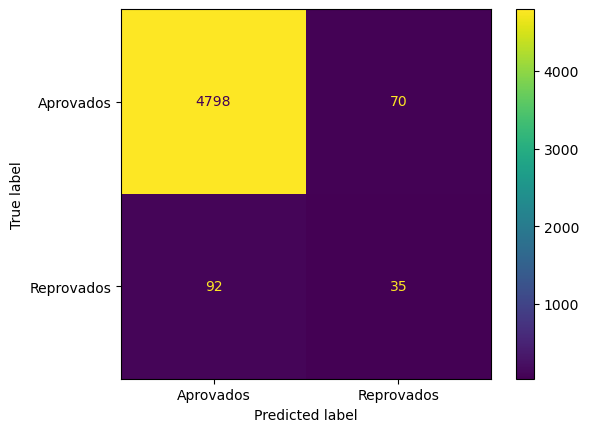

In [67]:
# 2. Visualização da matriz de confusão para a base de teste
cm_test = confusion_matrix(y_test, y_chapeu_test)
MatrizDeConfusao2 = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao2.plot()

In [105]:
#3.)
accuracia_teste = accuracy_score(y_test, y_chapeu_test)
print(f'A acurácia na base de teste é {accuracia_teste*100:.2f}%')

A acurácia na base de teste é 96.76%


In [71]:
#4.) Criação e treinamento da nova arvore
clf2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

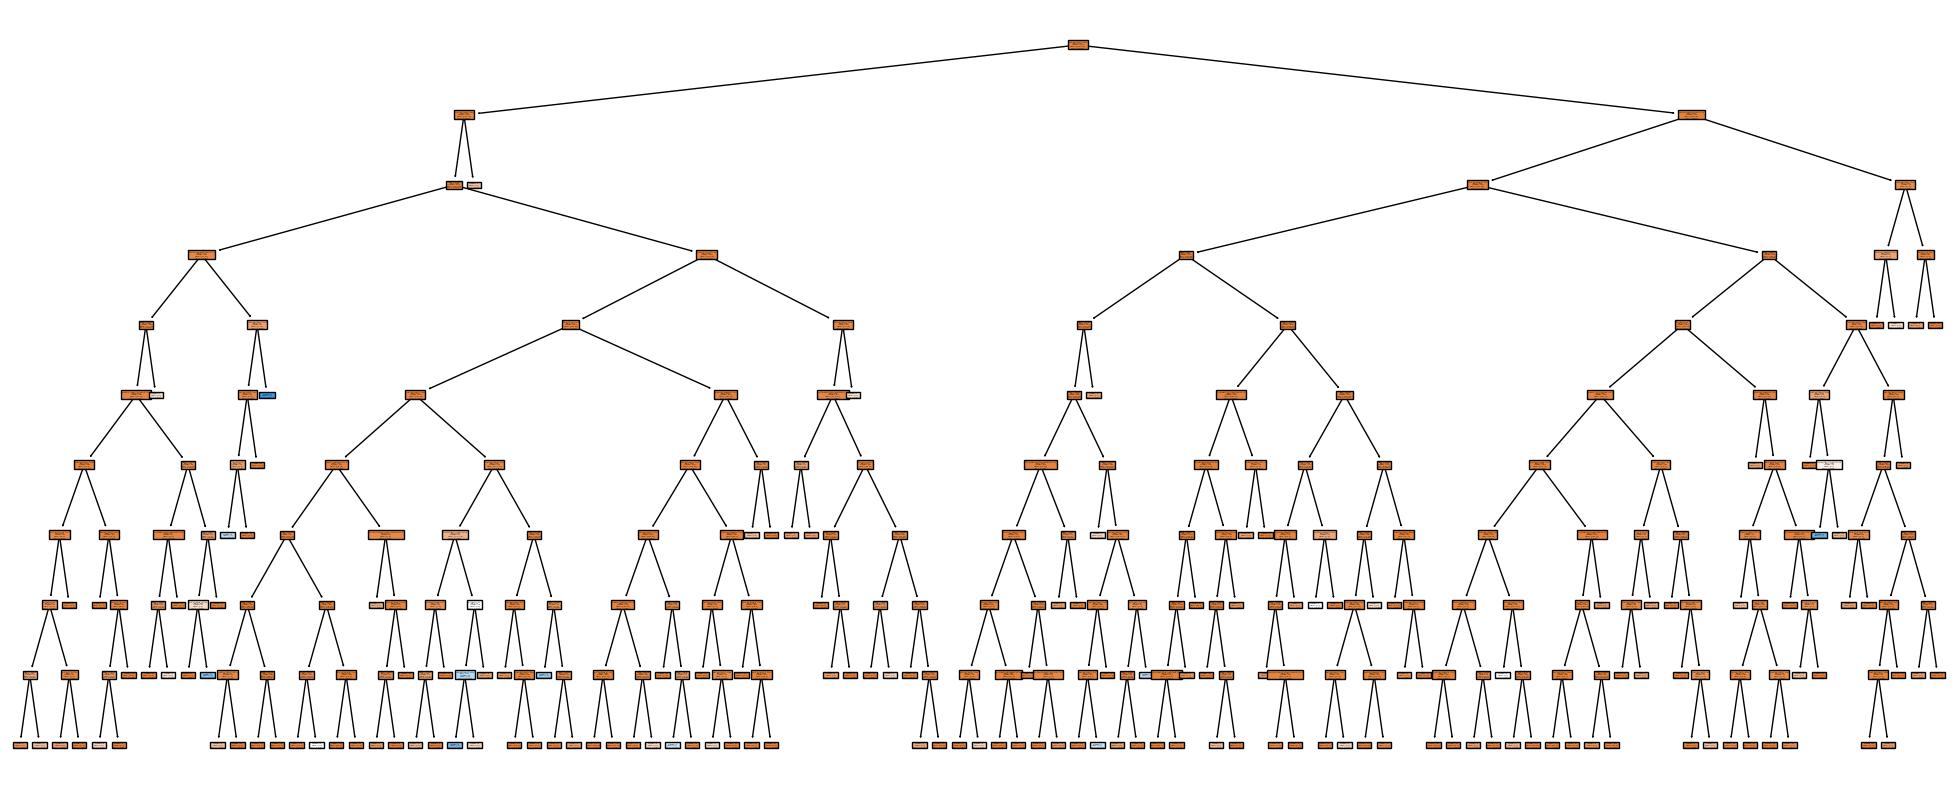

In [75]:
plt.figure(figsize=(25, 10))
plot_tree(clf2,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X_train.columns);

In [77]:
y_chapeu_train_2 = clf2.predict(X_train)
y_chapeu_train_2

array([0, 0, 0, ..., 0, 0, 0])

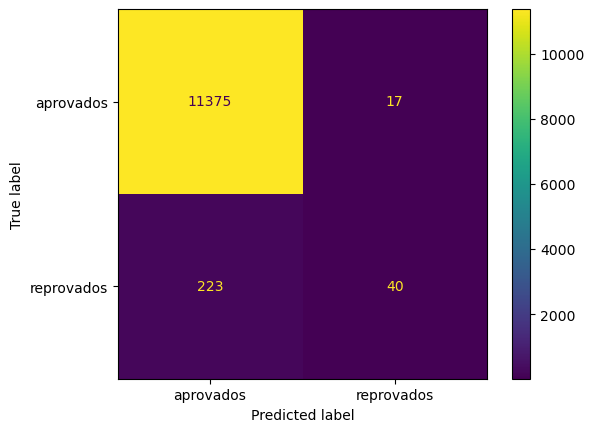

In [79]:
cm_2 = confusion_matrix(y_train, y_chapeu_train_2)
cm_plot_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=['aprovados', 'reprovados'])
cm_plot_2.plot()

In [103]:
acuracia_teste2 = accuracy_score(y_train, y_chapeu_train_2)
print(f'A acurácia na base de treinamento é {acuracia_teste2*100:.2f}%')

A acurácia na base de treinamento é 97.94%


In [101]:
print(f'A proporção de proponentes classificados como maus é {(40/(40+223+11375+17))*100:.3f}%.')

A proporção de proponentes classificados como maus é 0.343%.


In [99]:
acuracia_todas_boas = accuracy_score(y_test, np.zeros_like(y_test))
print(f'A Acurácia do modelo ao classificar todas as instâncias como "aprovados" é: {acuracia_todas_boas*100:.2f}%')

A Acurácia do modelo ao classificar todas as instâncias como "aprovados" é: 97.46%
